In [1]:
from preamble import *

# 지도학습 알고리즘
## k-최근접 이웃
### k-최근접 이웃분류

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53580 missing from current font.


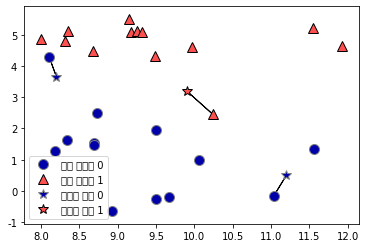

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors = 1) #k값을 1로 넣었을때 /별은 새로들어온 데이터(test data)
# 가장 가까운 하나의 데이터를 찾음 k = 1

C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends

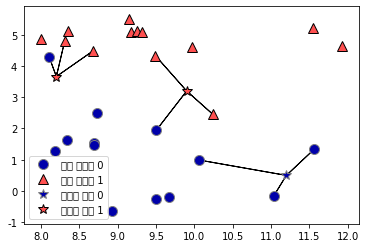

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors = 3) #k값을 3 / 보통 홀수로 쓰임 feature가 많을수록 느려짐

In [4]:
from sklearn.model_selection import train_test_split # 알아서 train set과 test set을 나눠줌
X,y = mglearn.datasets.make_forge()

print(X.shape)
print(y.shape)

X_train, X_test, y_train,y_test = train_test_split(X,y,random_state = 0) #75:25 비율

(26, 2)
(26,)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [6]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [7]:
y_pred = clf.predict(X_test)
print("테스트 세트 예측 : ",y_pred)
print("테스트 세트 참값 : ",y_test)

테스트 세트 예측 :  [1 0 1 0 1 0 0]
테스트 세트 참값 :  [1 0 1 0 1 1 0]


In [8]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


## KNeighborsClassifier 분석

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


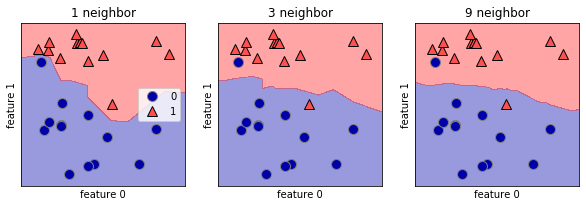

In [9]:
fig,axes = plt.subplots(1,3,figsize = (10,3))

for n_neighbors, ax in zip ([1,3,9],axes): #neighbor가 1,3,9일때
    # fit 메소드는 self 오브젝트를 리턴합니다.
    # 그래서 객체 생성과 fir 메소드를 한 줄에 쓸 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y) #하나로 묶어 씀
    #train데이터를 나눠서 한것이 아니라 X 전체를 그림 - 선이 디시젼 바운더리
    #k 값이 클수록 완만해 진다 / K값이 작을수록 train데이터의 정확도가 좋다
    #K가 3정도가 제일 일반화에 가깝다
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps = 0.5 , ax = ax,alpha =.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc = 'best')

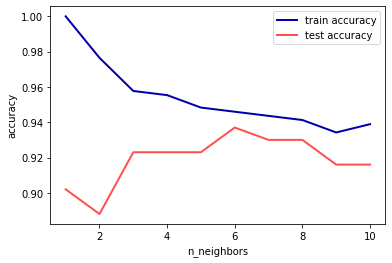

In [12]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
#train 과 test set 나누기
X_train, X_test, y_train, y_test = train_test_split(
cancer['data'], cancer.target,stratify=cancer.target,random_state = 66) 

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors 를 적용
neighbors_settings = range(1,11) #1~10까지 neighbor

for n_neighbors in neighbors_settings:
    #모델 생성
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    #훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train,y_train))
    
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings,training_accuracy, label = "train accuracy")
plt.plot(neighbors_settings,test_accuracy, label = "test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend() 
#일반적으로  test가 제일 높은 6이 낫다

## k-neighbors Regression

C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\bac

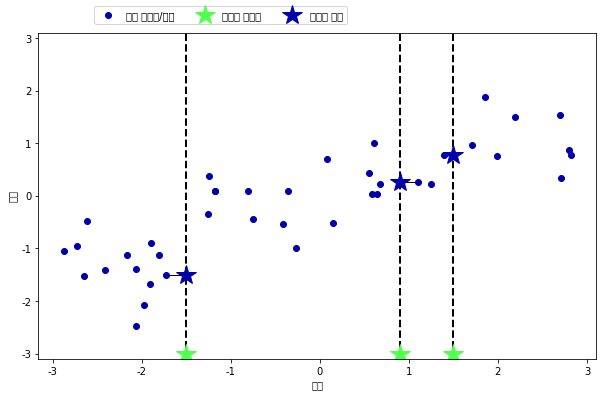

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaco\lib\site-packages\matplotlib\backends\bac

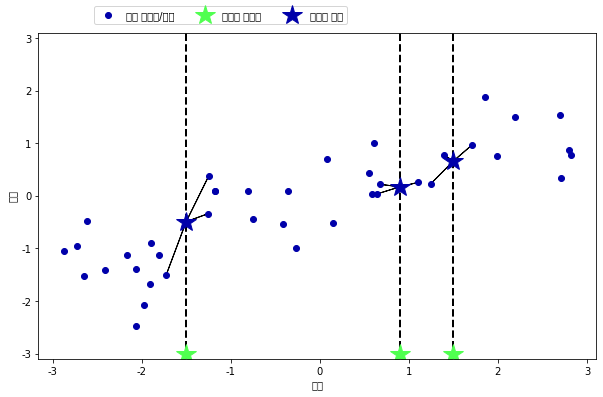

In [16]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples = 40)

#Wave 데이터 셋을 훈련 세트와 테스트 세트로 나눔
X_train, X_test , y_train, y_test = train_test_split(X,y,random_state = 0)

print(X_train.shape)
print(X_test.shape)

#이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors = 3)

#훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

(30, 1)
(10, 1)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [23]:
print("테스트 세트 예측:\n",reg.predict(X_test))

테스트 세트 예측:
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [26]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test,y_test)))

테스트 세트 R^2: 0.83


## KNeighborsRegressor 분석

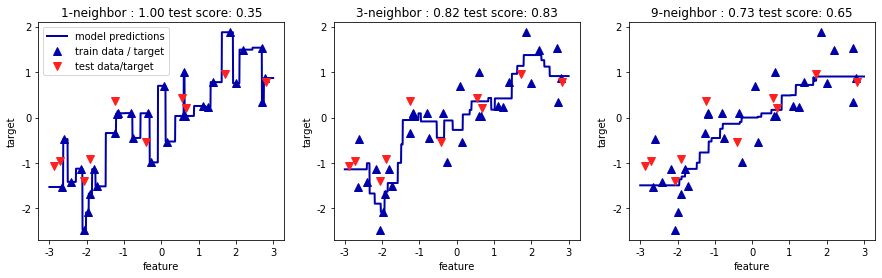

In [31]:
fig, axes = plt.subplots(1,3,figsize = (15,4))

#-3과 3사이에 1,000개의 데이터 포인트를 만듭니다.
line = np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors, ax in zip ([1,3,9],axes):
    
    #1,3,9 이웃을 사용한 예측을 합니다.
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train,y_train,'^',c = mglearn.cm2(0),markersize = 8)
    ax.plot(X_test,y_test,'v',c = mglearn.cm2(1),markersize = 8)
    
    ax.set_title(
    "{}-neighbor : {:.2f} test score: {:.2f}".format(
    n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
axes[0].legend(["model predictions","train data / target","test data/target"],loc ="best")